In [35]:
#Codsoft
#Task 3
# --> IRIS FLOWER CLASSIFICATION  <--
#Importing required modules

import numpy as n
import pandas as p
from sklearn.cluster import KMeans
import matplotlib.pyplot as mat
import seaborn as s

In [36]:
#Loading data
df_iris = s.load_dataset('iris')
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [37]:
df_iris['species'],categories =p.factorize(df_iris['species'])
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [38]:
#Describing dataset
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [39]:
df_iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

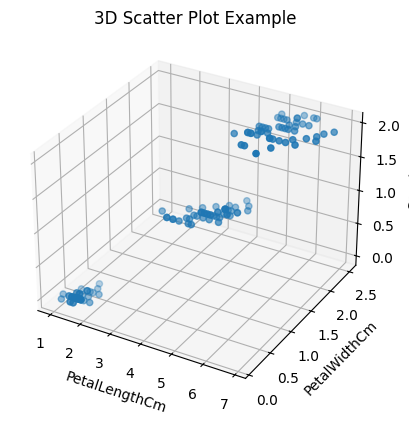

In [49]:
#Visualizing the data
from mpl_toolkits.mplot3d import Axes3D
fig = mat.figure()
a = fig.add_subplot(111, projection='3d')
a.scatter(df_iris.petal_length, df_iris.petal_width, df_iris.species)
a.set_xlabel('PetalLengthCm')
a.set_ylabel('PetalWidthCm')
a.set_zlabel('Species')
mat.title('3D Scatter Plot Example')
mat.show()

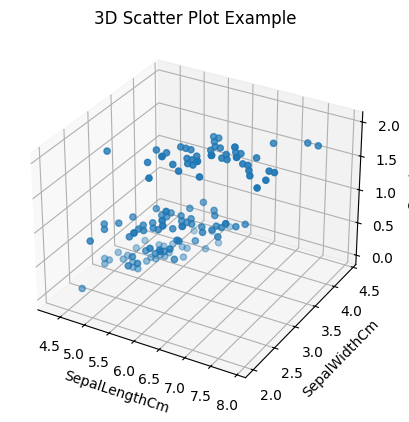

In [51]:
#Visualizing the data in the other form
from mpl_toolkits.mplot3d import Axes3D
fig = mat.figure()
b = fig.add_subplot(111, projection='3d')
b.scatter(df_iris.sepal_length, df_iris.sepal_width, df_iris.species)
b.set_xlabel('SepalLengthCm')
b.set_ylabel('SepalWidthCm')
b.set_zlabel('Species')
mat.title('3D Scatter Plot Example')
mat.show()

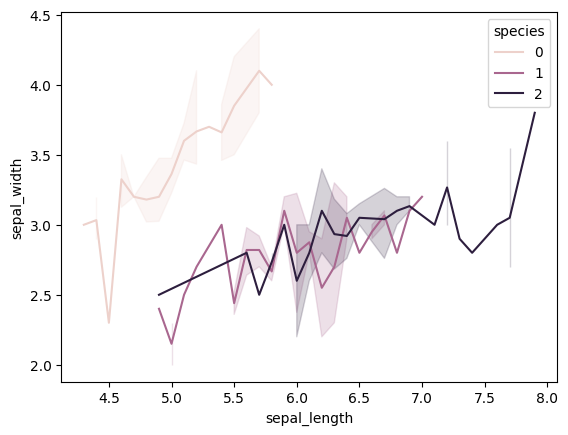

In [54]:
#Line plot
s.lineplot(data=df_iris, x="sepal_length", y="sepal_width",hue="species");

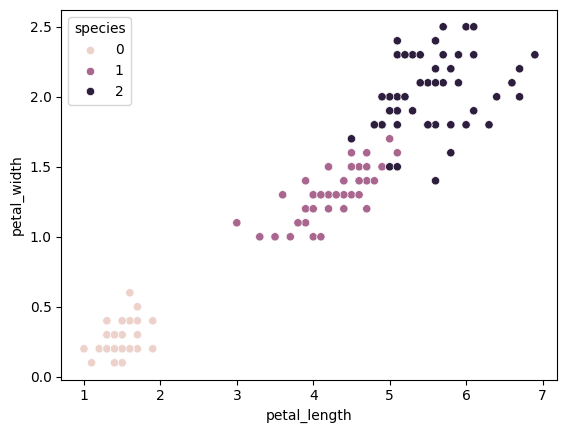

In [53]:
#visualizating the distribution of data through scatter plot
s.scatterplot(data=df_iris, x="petal_length", y="petal_width",hue="species");

In [57]:
#applying elbow technique
jd_iris = range(1,10)
new=[]

for k in jd_iris:
  km = KMeans(n_clusters=k)
  km.fit(df_iris[[ 'petal_length', 'petal_width']])
  new.append(km.inertia_)
new

[550.8953333333334,
 86.39021984551395,
 31.412885668276978,
 19.483000899685116,
 13.983213141025642,
 11.156368460991157,
 9.500978672428491,
 7.6241930625797245,
 7.0580281385281385]

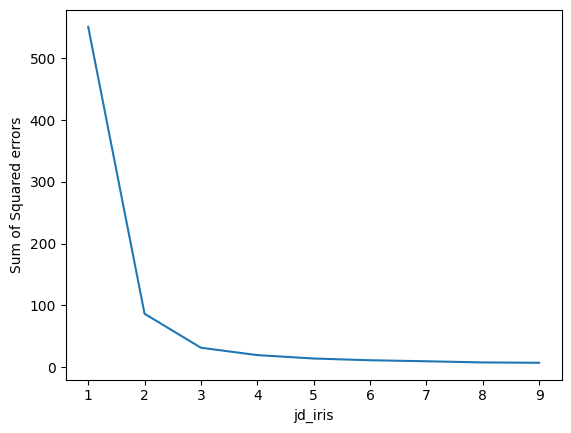

In [58]:
mat.xlabel('jd_iris')
mat.ylabel("Sum of Squared errors")
mat.plot(jd_iris, new)

In [59]:
#mean algorithm 
ran = KMeans(n_clusters=3,random_state=0,)
y_predicted = km.fit_predict(df_iris[['petal_length','petal_width']])
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 7, 3, 1, 1, 7, 5, 1, 3, 5, 1, 3, 1, 3, 1,
       1, 3, 1, 3, 7, 3, 7, 1, 1, 1, 7, 7, 1, 5, 3, 3, 3, 7, 1, 1, 1, 1,
       3, 3, 1, 1, 3, 5, 3, 3, 3, 1, 5, 3, 2, 4, 2, 8, 2, 6, 1, 6, 8, 2,
       4, 4, 4, 4, 4, 4, 8, 6, 6, 7, 2, 4, 6, 7, 2, 8, 7, 7, 2, 8, 8, 6,
       2, 7, 8, 2, 2, 8, 7, 4, 2, 4, 4, 2, 2, 4, 4, 4, 4, 7])

In [47]:
df_iris['cluster']=y_predicted
df_iris.head(150)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,2
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


In [60]:
from sklearn.metrics import confusion_matrix
ir = confusion_matrix(df_iris.species, df_iris.cluster)
ir

array([[ 0, 50,  0],
       [48,  0,  2],
       [ 4,  0, 46]], dtype=int64)

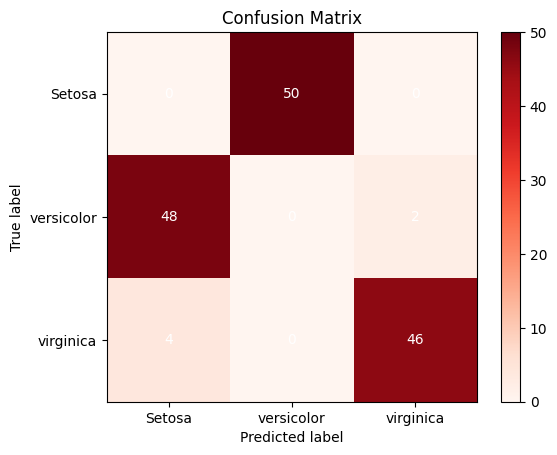

In [61]:
true_labels = df_iris.species
predicted_labels= df_iris.cluster

cm = confusion_matrix(true_labels, predicted_labels)
class_labels = ['Setosa', 'versicolor', 'virginica']

# Plot confusion matrix
mat.imshow(cm, interpolation='nearest', cmap=mat.cm.Reds)
mat.title('Confusion Matrix')
mat.colorbar()
tick_marks = n.arange(len(class_labels))
mat.xticks(tick_marks, class_labels)
mat.yticks(tick_marks, class_labels)

# Fill matrix with values
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        mat.text(j, i, str(cm[i][j]), ha='center', va='center', color='white')

mat.xlabel('Predicted label')
mat.ylabel('True label')
mat.show()